In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv("training_set.csv")

# Check the first 5 rows of the data
df.head()

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num,ind
0,1,0.231980,-0.190620,-0.985933,-0.233773,-0.355879,-0.488884,0.254773,-0.121213,-0.820528,...,0.101373,0.575414,-0.567646,-0.051293,0.455840,0.065538,0.020671,25,14,0
1,2,0.168223,-1.204551,-0.596952,-0.722583,0.284799,-0.238639,-0.410948,-0.090654,1.220703,...,0.407270,0.769329,0.555820,0.252843,0.603888,1.240028,-0.076253,23,4,0
2,3,0.522005,-0.759933,-1.209413,0.301834,0.361126,0.158161,-0.117013,0.313158,1.102455,...,0.143658,0.874958,0.679421,0.393198,0.439103,0.742181,-0.430493,29,8,0
3,4,0.038746,-1.408335,-0.580810,0.353450,1.142353,-0.418879,-0.134133,-0.199796,1.071100,...,0.728436,0.540930,1.968447,0.185315,0.630167,0.577032,0.117681,14,3,0
4,5,-0.307572,0.103575,-0.368605,-0.378654,-0.285990,-0.508058,-0.254869,-0.108291,-0.095139,...,-0.146845,0.497731,-0.299924,-0.020024,0.975511,-0.342360,-0.428779,35,9,0


In [ ]:
# Check the distribution of values in "ind"
df["ind"].value_counts(normalize=True)

ind
0    0.901292
1    0.098708
Name: proportion, dtype: float64

In [ ]:
# Remove word embeddings columns and see the statistics
df_no_text = df[["ID", "word_count", "punc_num", "ind"]]
df_no_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          11144 non-null  int64
 1   word_count  11144 non-null  int64
 2   punc_num    11144 non-null  int64
 3   ind         11144 non-null  int64
dtypes: int64(4)
memory usage: 348.4 KB


In [ ]:
# Check if there's any difference between AI generated tweets and human generated tweets.

# word count
ai_text_word_count = df_no_text.loc[df["ind"] == 1, ["word_count"]]
human_text_word_count = df_no_text.loc[df["ind"] == 0, ["word_count"]]

stats_word_count = pd.concat([ai_text_word_count, human_text_word_count], axis=1)
stats_word_count.columns = ["AI", "Human"]
stats_word_count

,AI,Human
7,14.0,NaN
16,23.0,NaN
27,26.0,NaN
31,28.0,NaN
51,25.0,NaN
...,...,...
11138,NaN,35.0
11139,NaN,15.0
11141,NaN,12.0
11142,NaN,30.0


In [ ]:
# punctuation count
ai_text_punc_count = df_no_text.loc[df["ind"] == 1, ["punc_num"]]
human_text_punc_count = df_no_text.loc[df["ind"] == 0, ["punc_num"]]
stats_punc_count = pd.concat([ai_text_punc_count, human_text_punc_count], axis=1)
stats_punc_count.columns = ["AI", "Human"]
stats_punc_count

,AI,Human
7,1.0,NaN
16,1.0,NaN
27,1.0,NaN
31,5.0,NaN
51,5.0,NaN
...,...,...
11138,NaN,10.0
11139,NaN,2.0
11141,NaN,5.0
11142,NaN,7.0


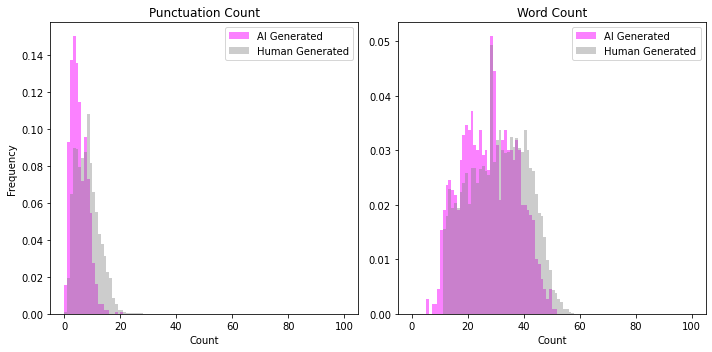

In [ ]:
import matplotlib.pyplot as plt

# Percentage plot side by side
num_bins = 100
range_val = (0, 100)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].hist(
    ai_text_punc_count,
    bins=num_bins,
    range=range_val,
    alpha=0.8,
    color="#FA62FF",
    edgecolor="None",
    density=True,
    label="AI Generated",
)
axs[0].hist(
    human_text_punc_count,
    bins=num_bins,
    range=range_val,
    alpha=0.4,
    color="grey",
    edgecolor="None",
    density=True,
    label="Human Generated",
)
axs[1].hist(
    ai_text_word_count,
    bins=num_bins,
    range=range_val,
    alpha=0.8,
    color="#FA62FF",
    edgecolor="None",
    density=True,
    label="AI Generated",
)
axs[1].hist(
    human_text_word_count,
    bins=num_bins,
    range=range_val,
    alpha=0.4,
    color="grey",
    edgecolor="None",
    density=True,
    label="Human Generated",
)
# axs[0].set_facecolor('#96FFFF')
# axs[1].set_facecolor('#96FFFF')
axs[0].set_xlabel("Count")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Punctuation Count")
axs[0].legend(loc="upper right")
axs[1].set_xlabel("Count")
# axs[1].set_ylabel('Frequency')
axs[1].set_title("Word Count")
axs[1].legend(loc="upper right")
axs[0].grid(False)
axs[1].grid(False)
plt.tight_layout()

In [ ]:
# Get the column names starting with 'feature_'
feature_columns = [col for col in df.columns if col.startswith("feature_")]
# Subtract the feature columns from the rest of the dataframe
df_subtracted = df[feature_columns]

# PCA on features.
from sklearn.decomposition import PCA

# Create an instance of the PCA class
pca = PCA(n_components=200)
# Perform PCA on the selected variables
pca_features = pca.fit_transform(df_subtracted)

pca_features_df = pd.DataFrame(pca_features)
pca_features_df.columns = pca_feature_list = [
    "feature_pca_" + str(i) for i in range(200)
]

pca_features_df.head()

# Add PCAs back to the dataframe
df_pca_joined = pd.concat([df.drop(columns=feature_columns), pca_features_df], axis=1)

df_pca_joined.head()

,ID,word_count,punc_num,ind,feature_pca_0,feature_pca_1,feature_pca_2,feature_pca_3,feature_pca_4,feature_pca_5,...,feature_pca_190,feature_pca_191,feature_pca_192,feature_pca_193,feature_pca_194,feature_pca_195,feature_pca_196,feature_pca_197,feature_pca_198,feature_pca_199
0,1,25,14,0,-4.325339,-6.027924,-0.353441,0.646321,3.176395,0.056122,...,-0.101587,0.090285,-0.478319,0.142154,0.417347,0.033810,0.009218,-0.291785,-0.170732,0.270820
1,2,23,4,0,9.537069,2.460621,1.681083,1.184408,-0.347033,1.034544,...,0.131475,-0.227456,0.161564,-0.470222,-0.009364,-0.141194,-0.058794,-0.002401,0.256160,0.382212
2,3,29,8,0,7.884325,-0.447550,-1.036353,3.073986,-0.969599,1.029391,...,0.179291,0.038111,0.143245,0.302421,0.128760,-0.329273,-0.178594,-0.000766,0.108933,-0.360473
3,4,14,3,0,14.106463,-0.740270,0.088899,-1.275454,-2.169012,-0.618171,...,-0.010793,-0.242233,0.144745,0.103251,-0.461920,0.158246,-0.153596,-0.085440,-0.056733,-0.005762
4,5,35,9,0,-6.444397,0.027403,6.044623,1.516972,1.096130,1.462042,...,-0.097418,0.184250,0.278013,0.107154,0.145104,0.153692,-0.106945,0.114146,0.137521,-0.103845


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
import random

random.seed(1101)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_pca_joined.drop("ind", axis=1), df["ind"], test_size=0.2, random_state=42
)
# Create an instance of the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1500)
# Fit the model to the training data
logistic_regression.fit(X_train, y_train)
# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)
# Evaluate the performance using the F1 score
f1score = f1_score(y_test, y_pred)
# Print the F1 score
print("F1 Score:", f1score)

F1 Score: 0.5808383233532933


In [ ]:
# Load the test data
test = pd.read_csv("test_set.csv")
test.head()

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,word_count,punc_num
0,1,0.233878,-0.575866,-0.817383,-1.308944,0.203170,-0.151178,-0.377259,-0.167252,0.260954,...,-1.252782,-0.030583,0.779688,0.680167,-0.147269,-0.162226,0.387746,-0.365837,24,7
1,2,-0.378112,0.019394,-0.261695,-0.213910,-0.339688,-0.440592,-0.247194,-0.134335,-0.160141,...,-0.287018,-0.208572,0.597342,-0.051946,0.072536,0.934986,-0.408139,-0.410480,36,9
2,3,-0.971502,-0.624442,-0.244309,-0.227205,-0.290587,0.235740,0.334917,-0.306881,0.188613,...,-0.198927,-0.063470,0.382500,0.318730,0.241873,1.182121,-0.157274,0.184486,22,2
3,4,0.206271,-0.234456,-0.275528,0.724101,-0.734225,-1.006453,-0.140558,-0.190625,-0.465205,...,-0.905444,0.213316,0.808676,0.220842,0.038097,0.151985,-0.024990,0.248526,38,5
4,5,-0.281816,-0.314982,-0.386653,-0.582492,-0.331799,-0.366927,-0.467231,-0.313802,0.383410,...,-0.037087,-0.238236,0.868876,-0.010560,-0.244176,0.980425,-0.363208,-0.568092,37,13


In [ ]:
feature_columns = [col for col in test.columns if col.startswith("feature_")]
# Subtract the feature columns from the rest of the dataframe
test_subtracted = test[feature_columns]
pca_features_test = pca.fit_transform(test_subtracted)

# Convert the numpy array into dataframe and combine it with the original dataframe
pca_features_test_df = pd.DataFrame(pca_features_test)
pca_features_test_df.columns = ["feature_pca_" + str(i) for i in range(200)]

# Add PCAs back to the dataframe
test_pca_joined = pd.concat(
    [test.drop(columns=feature_columns), pca_features_test_df], axis=1
)
test_pca_joined.head()

,ID,word_count,punc_num,feature_pca_0,feature_pca_1,feature_pca_2,feature_pca_3,feature_pca_4,feature_pca_5,feature_pca_6,...,feature_pca_190,feature_pca_191,feature_pca_192,feature_pca_193,feature_pca_194,feature_pca_195,feature_pca_196,feature_pca_197,feature_pca_198,feature_pca_199
0,1,24,7,7.331135,-2.627214,1.523553,-1.920790,0.402267,0.644571,0.867111,...,-0.166294,-0.056639,0.007233,-0.616220,0.046128,-0.185665,-0.153196,0.248697,-0.165073,-0.067874
1,2,36,9,-6.540163,-0.129644,5.552589,1.347066,0.659023,1.665516,-0.559747,...,0.345570,0.075405,-0.164589,-0.034840,0.485939,-0.019579,0.143140,-0.118916,-0.057188,-0.173378
2,3,22,2,-2.515153,-0.468662,0.466776,-7.303473,-0.767054,-0.131561,-1.049854,...,0.645900,-0.164854,0.504634,0.118554,-0.764464,0.203696,-0.405349,-0.573001,0.037934,0.364075
3,4,38,5,-3.357898,2.827591,2.585157,-0.385822,-0.535258,-0.292688,-0.043963,...,0.317265,0.057457,-0.017869,0.560604,-0.253421,0.101223,0.090320,0.473847,0.230425,0.269639
4,5,37,13,-6.245943,-0.602105,5.276954,1.640834,1.570591,1.760647,-0.367180,...,0.085685,0.161059,-0.224495,0.130635,0.109111,0.173881,-0.097409,-0.257853,-0.012825,0.197802


In [ ]:
# Scoring
prediction = logistic_regression.predict(test_pca_joined)

# Check the predictions
from collections import Counter

Counter(prediction)

Counter({0: 2564, 1: 222})

In [ ]:
# First let's add "ind" column to the test data with the predictions.
test["ind"] = prediction

# Subset the "ID" and "ind" columns so the file structure is the same as 'solution_format.csv'
solution = test[["ID", "ind"]]

# Check the format
format = pd.read_csv("solution_format.csv")

print(format.head())
print(solution.head())

   ID  ind
0   1    0
1   2    0
2   3    0
3   4    1
4   5    1
   ID  ind
0   1    0
1   2    0
2   3    0
3   4    0
4   5    0


In [ ]:
# Save the solution in csv format
solution.to_csv("solution.csv", index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a605a3e6-1564-47b2-94e7-842290ba7692' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>